In [16]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


# Load the Data

(x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



# Length of the Data

print("Lenghth of X Train :", len(x_train))
print("Lenghth of X Test :", len(x_test))
print("Lenghth of Y Train :", len(y_train))
print("Lenghth of Y Test :", len(y_test))



Lenghth of X Train : 60000
Lenghth of X Test : 10000
Lenghth of Y Train : 60000
Lenghth of Y Test : 10000


In [17]:
# Shape of the Data

print("Shape of X Train :", x_train.shape)
print("Shape of X Test :", x_test.shape)
print("Shape of Y Train :", y_train.shape)
print("Shape of Y Test :", y_test.shape)


Shape of X Train : (60000, 28, 28)
Shape of X Test : (10000, 28, 28)
Shape of Y Train : (60000,)
Shape of Y Test : (10000,)


Value : 5




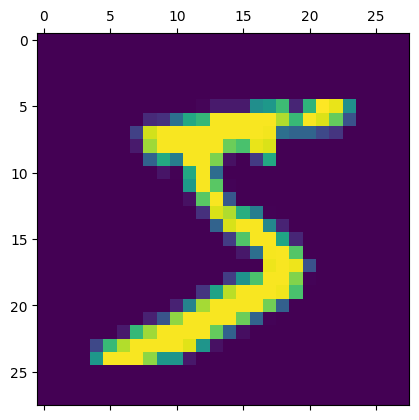

In [35]:
# View the Data

print("Value :",y_train[0])

print("\n")

plt.matshow(x_train[0])


In [21]:
# Scale the X Train values

x_train = x_train / 255
x_test = x_test / 255


In [22]:
# Create a Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),  #------- Hidden Layer
    keras.layers.Dense(10, activation='sigmoid')
])


# Complie

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8771 - loss: 0.4326
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9644 - loss: 0.1213
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9768 - loss: 0.0807
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9832 - loss: 0.0554
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0421


In [25]:
# Evaluate on both Train & Test Dataset

EV1 = model.evaluate(x_train, y_train)
print("Evaluation on Train dataset :", EV1)

print("\n")

EV2 = model.evaluate(x_test, y_test)
print("Evaluation on Test dataset :", EV2)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9843 - loss: 0.0467
Evaluation on Train dataset : [0.04742114990949631, 0.9839500188827515]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1138
Evaluation on Test dataset : [0.09584325551986694, 0.9693999886512756]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted : 7




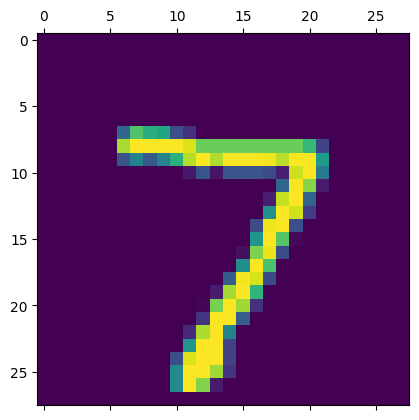

In [33]:
import numpy as np

# Predict the Data

y_predicted = model.predict(x_test)


# To Check the predicted Data

y_pred = np.argmax(y_predicted[0])
print("Predicted :",y_pred)

print("\n")

plt.matshow(x_test[0])


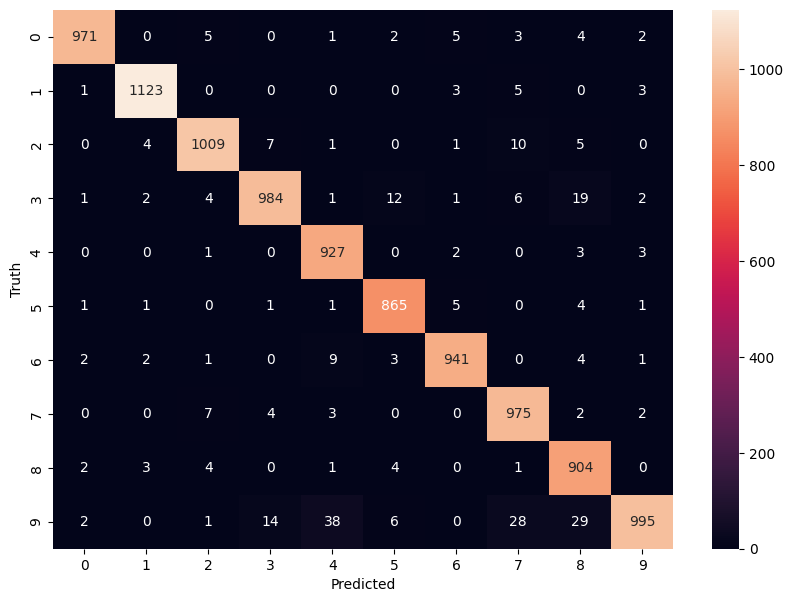

In [38]:
import seaborn as sn


# Convert Predicted array to whole number

y_predicted_labels = [np.argmax(i) for i in y_predicted]


# Plot the Confusion Matrix

CM = tf.math.confusion_matrix(y_predicted_labels, y_test)

plt.figure(figsize = (10,7))
sn.heatmap(CM, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()